In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm    
import numpy as np
import seaborn as sb

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split


#parse_dates=['Date']
Data = pd.read_csv('/Users/hugozavaleta/Desktop/ML-Project/prices.csv')
Data.describe()

,Regular Gasoline,Midgrade Gasoline,Premium Gasoline,Diesel
count,1482.000000,1482.000000,1482.000000,1482.000000
mean,2.269545,2.430412,2.593635,2.542297
std,0.879882,0.925673,0.975338,1.104984
min,0.885000,0.979000,1.074000,0.953000
25%,1.430000,1.517250,1.613500,1.439000
50%,2.251000,2.474500,2.716500,2.556000
75%,2.927750,3.092500,3.323000,3.267500
max,4.844000,5.191000,5.513000,5.810000


In [2]:
Data.head()

,Date,Regular Gasoline,Midgrade Gasoline,Premium Gasoline,Diesel
0,11/28/94 0:00,1.082,1.174,1.270,1.126
1,12/5/94 0:00,1.075,1.167,1.260,1.123
2,12/12/94 0:00,1.064,1.156,1.244,1.114
3,12/19/94 0:00,1.056,1.147,1.233,1.109
4,12/26/94 0:00,1.044,1.136,1.222,1.106


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1482 non-null   object 
 1   Regular Gasoline   1482 non-null   float64
 2   Midgrade Gasoline  1482 non-null   float64
 3   Premium Gasoline   1482 non-null   float64
 4   Diesel             1482 non-null   float64
dtypes: float64(4), object(1)
memory usage: 58.0+ KB


In [4]:
Data.isnull().sum()

Date                 0
Regular Gasoline     0
Midgrade Gasoline    0
Premium Gasoline     0
Diesel               0
dtype: int64

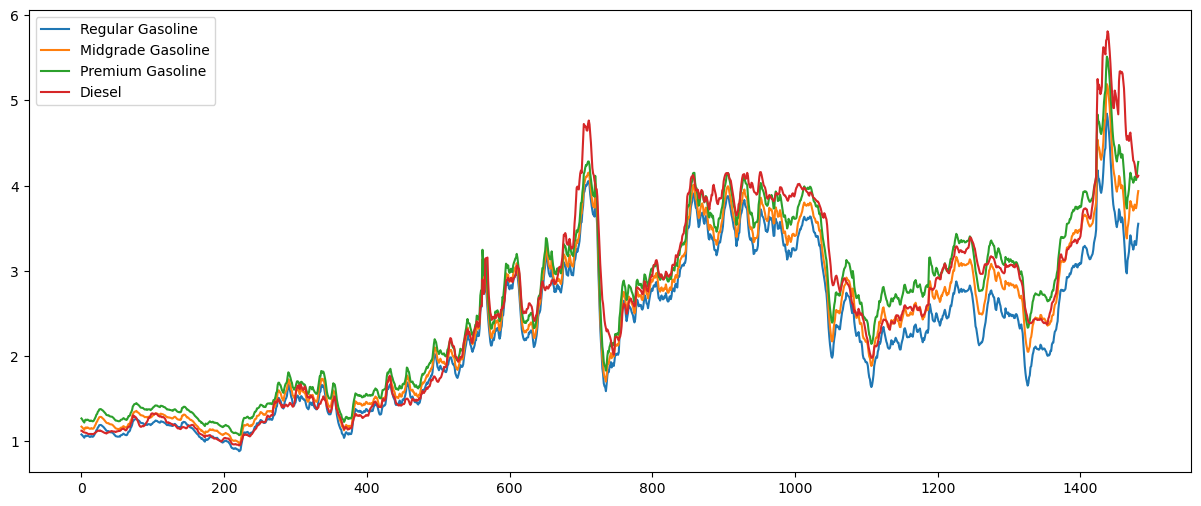

In [5]:
Data.plot(figsize=(15, 6))
plt.show()

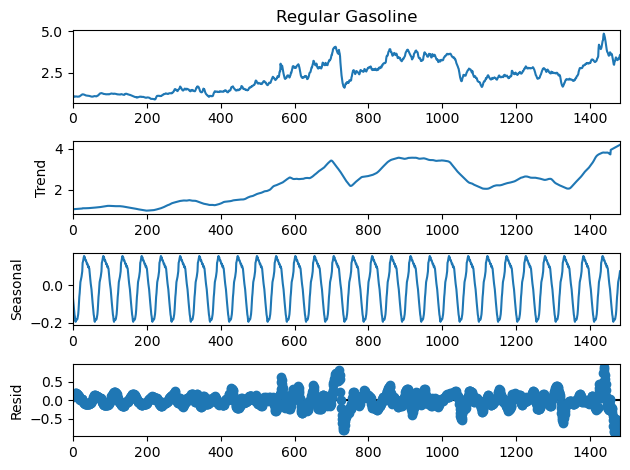

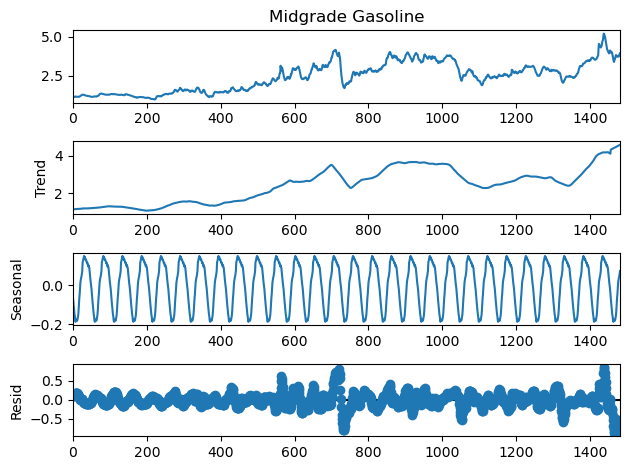

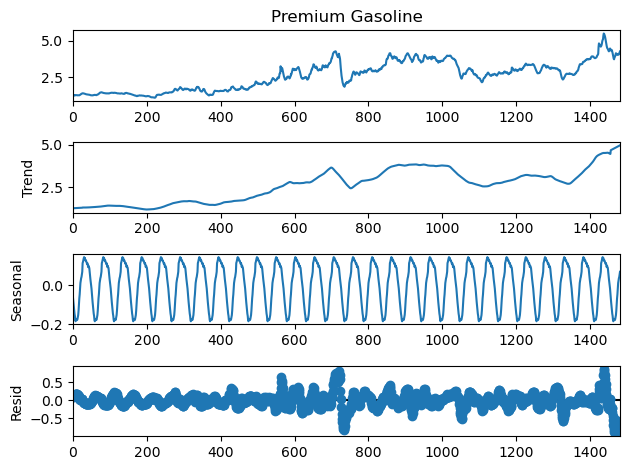

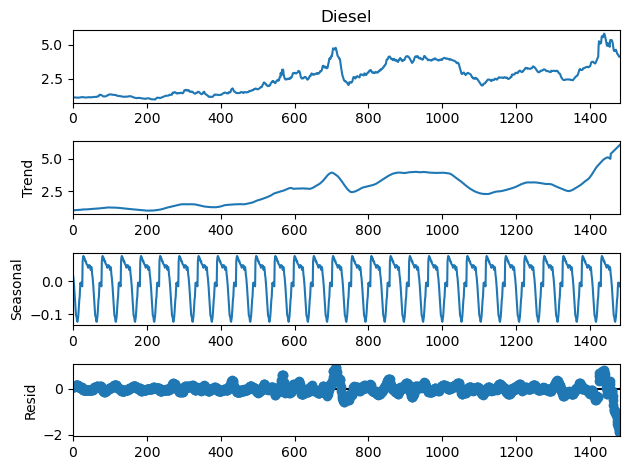

In [6]:
#decomposiong data
from statsmodels.tsa.seasonal import seasonal_decompose

Attributes = ['Regular Gasoline','Midgrade Gasoline','Premium Gasoline','Diesel']

for i in Attributes:
    mul_decompose = seasonal_decompose(Data[i], extrapolate_trend='freq',period = 52)
    mul_decompose.plot()
    plt.show()

In [7]:
#Splittig dataset
RG_X = Data[['Date','Regular Gasoline']]
RG_y = Data[['Date','Regular Gasoline']]

MG_X = Data[['Date','Midgrade Gasoline']]
MG_y = Data[['Date','Midgrade Gasoline']]

PG_X = Data[['Date','Premium Gasoline']]
PG_y = Data[['Date','Premium Gasoline']]

D_X = Data[['Date','Diesel']]
D_y = Data[['Date','Diesel']]

RG_X_train, RG_X_test, RG_y_train, RG_y_test = train_test_split(RG_X, RG_y, test_size = 0.01,shuffle = False)

MG_X_train, MG_X_test, MG_y_train, MG_y_test = train_test_split(MG_X, MG_y, test_size = 0.01,shuffle = False)
PG_X_train, PG_X_test, PG_y_train, PG_y_test = train_test_split(PG_X, PG_y, test_size = 0.01,shuffle = False)
D_X_train, D_X_test, D_y_train, D_y_test = train_test_split(D_X, D_y, test_size = 0.01,shuffle = False)


In [8]:
RG_y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1467 to 1481
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              15 non-null     object 
 1   Regular Gasoline  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 360.0+ bytes


In [9]:
RG_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1466
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1467 non-null   object 
 1   Regular Gasoline  1467 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.4+ KB


In [10]:
RG_y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1467 to 1481
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              15 non-null     object 
 1   Regular Gasoline  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 360.0+ bytes


In [11]:
#creating models and forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def createModel(df):
    return ExponentialSmoothing(df,trend='mul',seasonal = 'add',seasonal_periods=52).fit()
def predict(model):
    return model.forecast(steps =15)

RG_model = createModel(RG_X_train['Regular Gasoline'])
MG_model = createModel(MG_X_train['Midgrade Gasoline'])
PG_model = createModel(PG_X_train['Premium Gasoline'])
D_model  = createModel(D_X_train['Diesel'])

#RG_model = ExponentialSmoothing(RG_X_train['Regular Gasoline'],trend='mul',seasonal = 'add',seasonal_periods=52).fit()
RG_predict = predict(RG_model)
MG_predict = predict(MG_model)
PG_predict = predict(PG_model)
D_predict = predict(D_model)



In [12]:
#MG_predict
RG_y_test

,Date,Regular Gasoline
1467,1/9/23 0:00,3.167
1468,1/16/23 0:00,3.225
1469,1/23/23 0:00,3.340
1470,1/30/23 0:00,3.417
1471,2/6/23 0:00,3.362
1472,2/13/23 0:00,3.311
1473,2/20/23 0:00,3.293
1474,2/27/23 0:00,3.250
1475,3/6/23 0:00,3.288
1476,3/13/23 0:00,3.350


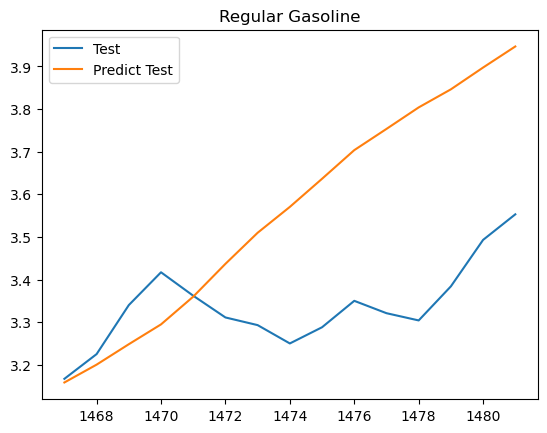

In [13]:
def comparisonGraph(train,test,predict,name):
    #train.plot(legend=True,label="Train",figsize=(10,6))
    test.plot(legend=True,label="Test",title=name)
    predict.plot(legend=True,label="Predict Test")

comparisonGraph(RG_X_train['Regular Gasoline'],RG_y_test['Regular Gasoline'],RG_predict,'Regular Gasoline')

In [104]:
print("Regular gas predict Values:")
print(RG_predict)
print("Test Values:")
print(RG_y_test['Regular Gasoline'])

Regular gas predict Values:
1467    3.158412
1468    3.200277
1469    3.248192
1470    3.294734
1471    3.359801
1472    3.436806
1473    3.509730
1474    3.570457
1475    3.636426
1476    3.703600
1477    3.753416
1478    3.803892
1479    3.846336
1480    3.897472
1481    3.946877
dtype: float64
Test Values:
1467    3.167
1468    3.225
1469    3.340
1470    3.417
1471    3.362
1472    3.311
1473    3.293
1474    3.250
1475    3.288
1476    3.350
1477    3.321
1478    3.304
1479    3.384
1480    3.493
1481    3.553
Name: Regular Gasoline, dtype: float64


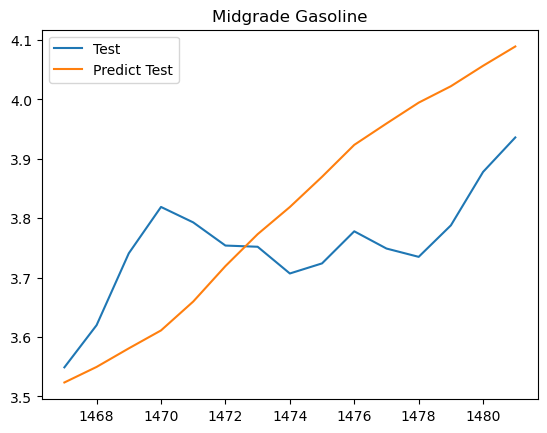

In [63]:
comparisonGraph(MG_X_train['Midgrade Gasoline'],MG_y_test['Midgrade Gasoline'],MG_predict,'Midgrade Gasoline')

In [105]:
print("Midgrade gas predict Values:")
print(MG_predict)
print("Test Values:")
print(MG_y_test['Midgrade Gasoline'])

Midgrade gas predict Values:
1467    3.523527
1468    3.549715
1469    3.580959
1470    3.611152
1471    3.659759
1472    3.719426
1473    3.773170
1474    3.818880
1475    3.869789
1476    3.923500
1477    3.959441
1478    3.994579
1479    4.022230
1480    4.056663
1481    4.089129
dtype: float64
Test Values:
1467    3.549
1468    3.620
1469    3.741
1470    3.819
1471    3.793
1472    3.754
1473    3.752
1474    3.707
1475    3.724
1476    3.778
1477    3.749
1478    3.735
1479    3.788
1480    3.878
1481    3.936
Name: Midgrade Gasoline, dtype: float64


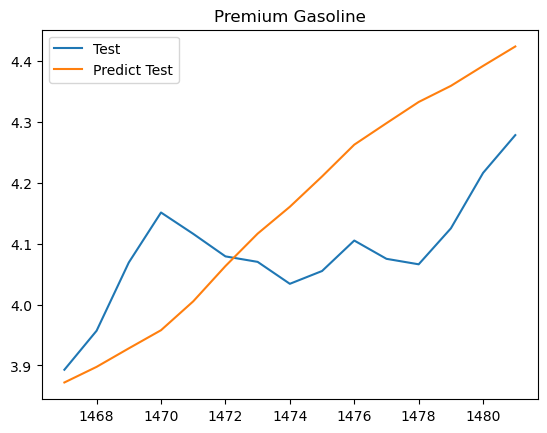

In [64]:
comparisonGraph(PG_X_train['Premium Gasoline'],PG_y_test['Premium Gasoline'],PG_predict,'Premium Gasoline')


In [106]:
print("Premiun gas predict Values:")
print(PG_predict)
print("Test Values:")
print(PG_y_test['Premium Gasoline'])

Premiun gas predict Values:
1467    3.872105
1468    3.897736
1469    3.928095
1470    3.957865
1471    4.005235
1472    4.063086
1473    4.116322
1474    4.160398
1475    4.210161
1476    4.262283
1477    4.297568
1478    4.332338
1479    4.358802
1480    4.391565
1481    4.423424
dtype: float64
Test Values:
1467    3.893
1468    3.957
1469    4.069
1470    4.151
1471    4.116
1472    4.079
1473    4.070
1474    4.034
1475    4.055
1476    4.105
1477    4.075
1478    4.066
1479    4.125
1480    4.216
1481    4.278
Name: Premium Gasoline, dtype: float64


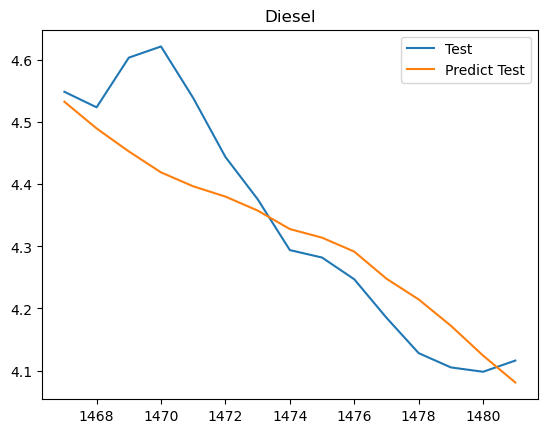

In [65]:
comparisonGraph(D_X_train['Diesel'],D_y_test['Diesel'],D_predict,'Diesel')

In [107]:
print("Diesel gas predict Values:")
print(D_predict)
print("Test Values:")
print(D_y_test['Diesel'])

Diesel gas predict Values:
1467    4.532995
1468    4.489978
1469    4.452971
1470    4.419183
1471    4.396732
1472    4.380195
1473    4.357689
1474    4.327908
1475    4.314030
1476    4.291570
1477    4.247945
1478    4.214507
1479    4.172172
1480    4.124029
1481    4.080743
dtype: float64
Test Values:
1467    4.549
1468    4.524
1469    4.604
1470    4.622
1471    4.539
1472    4.444
1473    4.376
1474    4.294
1475    4.282
1476    4.247
1477    4.185
1478    4.128
1479    4.105
1480    4.098
1481    4.116
Name: Diesel, dtype: float64


In [70]:
from sklearn.metrics import mean_squared_error
#MSE to determine the difference between the actual and predicted value
mean_squared_error(RG_y_test['Regular Gasoline'],RG_predict)

0.09369068871084887

In [71]:
from sklearn.metrics import mean_absolute_error

# predicting home prices in some area
mean_absolute_error(RG_y_test['Regular Gasoline'],RG_predict)

0.25383981472403633

In [87]:
mean_squared_error(MG_y_test['Midgrade Gasoline'],MG_predict)

0.024709329086054235

In [88]:
mean_absolute_error(MG_y_test['Midgrade Gasoline'],MG_predict)

0.1394560356053869

In [89]:
mean_squared_error(PG_y_test['Premium Gasoline'],PG_predict)

0.024511214246534265

In [90]:
mean_absolute_error(PG_y_test['Premium Gasoline'],PG_predict)

0.13798260220015468

In [91]:
mean_squared_error(D_y_test['Diesel'],D_predict)

0.00746968848724996

In [92]:
mean_absolute_error(D_y_test['Diesel'],D_predict)

0.06777842004460682

In [37]:
RG_model_final = createModel(Data['Regular Gasoline'])
MG_model_final = createModel(Data['Midgrade Gasoline'])
PG_model_final = createModel(Data['Premium Gasoline'])
D_model_final  = createModel(Data['Diesel'])

RG_predict_final = RG_model_final.forecast(steps = 10)
MG_predict_final = MG_model_final.forecast(steps = 10)
PG_predict_final = PG_model_final.forecast(steps = 10)
D_predict_final = D_model_final.forecast(steps = 10)


<AxesSubplot:title={'center':'Regular Gasoline'}>

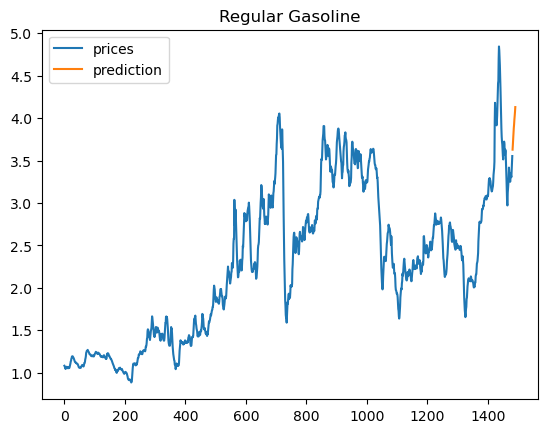

In [108]:
Data['Regular Gasoline'].plot(legend= True, label = 'prices',title='Regular Gasoline')
RG_predict_final.plot(legend = True, label = 'prediction')

In [110]:
print("Regular gasoline Forecast")
RG_predict_final

Regular gasoline Forecast


1482    3.628328
1483    3.688995
1484    3.756486
1485    3.820039
1486    3.882177
1487    3.925738
1488    3.983497
1489    4.026162
1490    4.074476
1491    4.130020
dtype: float64

<AxesSubplot:title={'center':'Midgrade Gasoline'}>

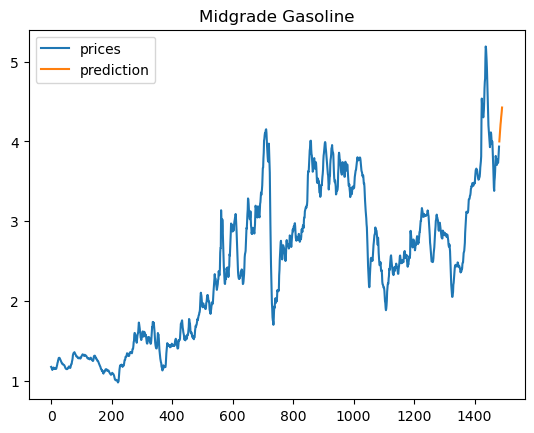

In [39]:
Data['Midgrade Gasoline'].plot(legend= True, label = 'prices',title='Midgrade Gasoline')
MG_predict_final.plot(legend = True, label = 'prediction')

In [114]:
print("Midgrade gasoline Forecast")
MG_predict_final

Midgrade gasoline Forecast


1482    4.000595
1483    4.051958
1484    4.108491
1485    4.162067
1486    4.214535
1487    4.250877
1488    4.300720
1489    4.337305
1490    4.378048
1491    4.425728
dtype: float64

<AxesSubplot:title={'center':'Premium Gasoline'}>

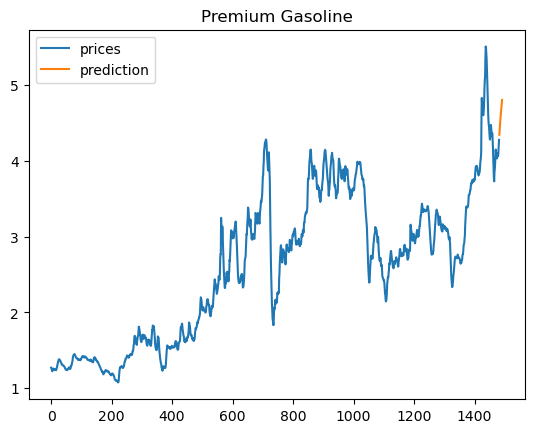

In [40]:
Data['Premium Gasoline'].plot(legend= True, label = 'prices',title='Premium Gasoline')
PG_predict_final.plot(legend = True, label = 'prediction')

In [111]:
print("Premium gasoline Forecast")
PG_predict_final

Premium gasoline Forecast


1482    4.346221
1483    4.402087
1484    4.461169
1485    4.519418
1486    4.575663
1487    4.618153
1488    4.670287
1489    4.711078
1490    4.755329
1491    4.806293
dtype: float64

<AxesSubplot:title={'center':'Diesel'}>

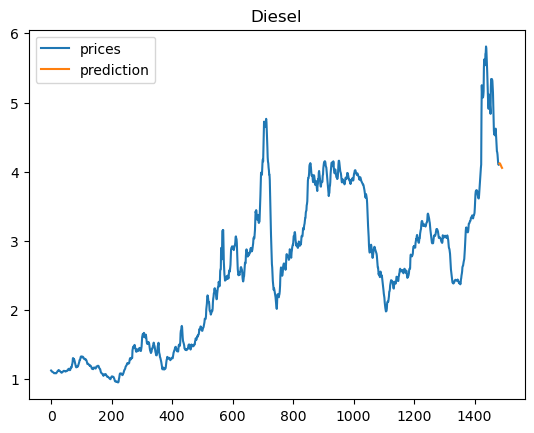

In [41]:
Data['Diesel'].plot(legend= True, label = 'prices',title='Diesel')
D_predict_final.plot(legend = True, label = 'prediction')

In [112]:
print("Diesel Forecast")
D_predict_final

Diesel Forecast


1482    4.117496
1483    4.120938
1484    4.119947
1485    4.110587
1486    4.103092
1487    4.089636
1488    4.083014
1489    4.069080
1490    4.062846
1491    4.054940
dtype: float64

In [225]:
#Dickey-Fuller Test(root test)- to check if the data is stationary or not  
#p-value > 0.05 non-statinary | p-value <= 0.05 statonary 
def isStationary(p_value):
    if p_value < 0.05:
        print(F"Data: is Stationary: {round(p_value,3)})")
    else:
        print(F"Data: is Not Stationary: {round(p_value,3)}")
    
Attributes = ['Regular Gasoline','Midgrade Gasoline','Premium Gasoline','Diesel']

for element in Attributes:
    p = sm.tsa.stattools.adfuller(Data[element])[1]
    print(element)
    isStationary(p)

Regular Gasoline
Data: is Not Stationary: 0.435
Midgrade Gasoline
Data: is Not Stationary: 0.537
Premium Gasoline
Data: is Not Stationary: 0.614
Diesel
Data: is Not Stationary: 0.404


In [20]:
RG_Data = Data['Regular Gasoline']
MG_Data = Data['Midgrade Gasoline']
PG_Data = Data['Premium Gasoline']
D_Data = Data['Diesel']


In [14]:
#df_log=np.sqrt()
#df_diff=df_log.diff().dropna()
#making the data stationary
RG_TF = np.sqrt(Data['Regular Gasoline'])
MG_TF = np.sqrt(Data['Midgrade Gasoline'])
PG_TF = np.sqrt(Data['Premium Gasoline'])
D_TF  = np.sqrt(Data['Diesel'])

RG_STNRY = RG_TF.diff().dropna()
MG_STNRY = MG_TF.diff().dropna()
PG_STNRY = PG_TF.diff().dropna()
D_STNRY  = D_TF.diff().dropna()

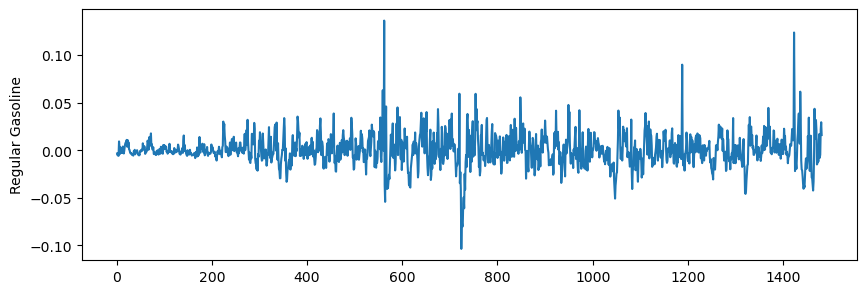

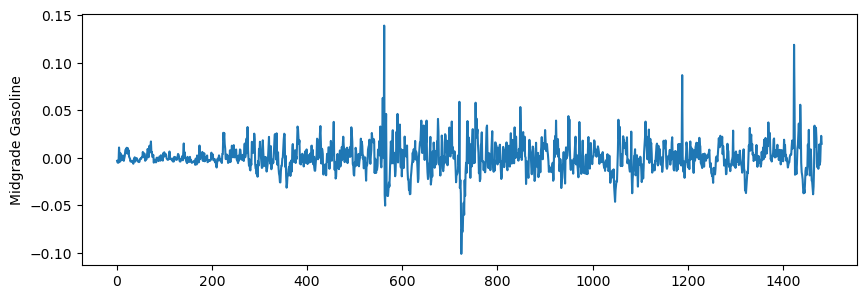

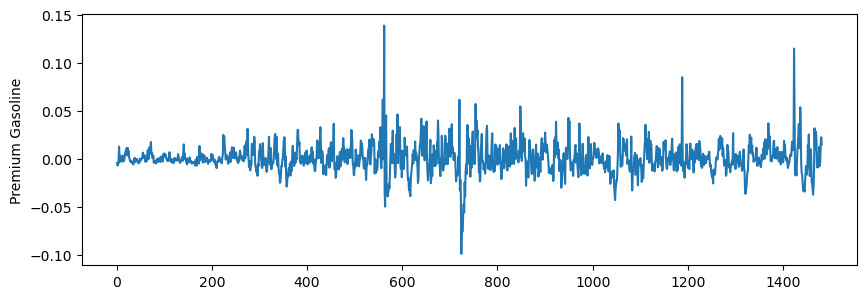

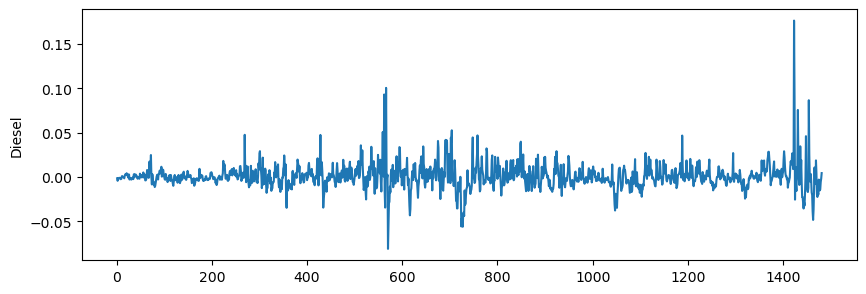

In [52]:
def displayGrap(df):
    plt.figure(figsize=(10,15))
    plt.subplot(4,1,1)
    sb.lineplot(data=df)
    
displayGrap(RG_STNRY)
displayGrap(MG_STNRY)
displayGrap(PG_STNRY)
displayGrap(D_STNRY)


In [61]:
isStationary(sm.tsa.stattools.adfuller(RG_STNRY)[1])

Data: is Stationary: 0.0)


In [66]:
RG_X = RG_STNRY
RG_y = RG_STNRY
RG_X_train, RG_X_test, RG_y_train, RG_y_test = train_test_split(RG_X, RG_y, test_size = 0.20)

In [29]:
RG_Model  =  ExponentialSmoothing(endog=Data['Regular Gasoline'], trend='mul',seasonal='mul',seasonal_periods=52).fit()




/Users/hugozavaleta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
